<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CNN-Review" data-toc-modified-id="CNN-Review-1">CNN Review</a></span></li><li><span><a href="#RNN-&amp;-LSTM" data-toc-modified-id="RNN-&amp;-LSTM-2">RNN &amp; LSTM</a></span></li><li><span><a href="#LSTM-주식가격-예측" data-toc-modified-id="LSTM-주식가격-예측-3">LSTM 주식가격 예측</a></span></li><li><span><a href="#Bidrectional" data-toc-modified-id="Bidrectional-4">Bidrectional</a></span></li><li><span><a href="#다음-문자-예측" data-toc-modified-id="다음-문자-예측-5">다음 문자 예측</a></span></li><li><span><a href="#Embedding-(영화-리뷰-데이터)" data-toc-modified-id="Embedding-(영화-리뷰-데이터)-6">Embedding (영화 리뷰 데이터)</a></span></li></ul></div>

# CNN Review

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

# one-hot encoding : categorical data(범주형 데이터) 변환
# 데이터의 차원은 데이터의 변수의 수를 의미
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)
(60000, 10) (10000, 10)


In [4]:
X = tf.keras.layers.Input(shape=(784,))
net = tf.keras.layers.Dense(64)(X)
net = tf.keras.layers.Activation('relu')(net)
net = tf.keras.layers.Dense(10)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 0s 8us/sample - loss: 9.7509 - acc: 0.7740
Epoch 2/10
60000/60000 [==============================] - 0s 6us/sample - loss: 1.0699 - acc: 0.8036
Epoch 3/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.6917 - acc: 0.8474
Epoch 4/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.5455 - acc: 0.8731
Epoch 5/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4568 - acc: 0.8894
Epoch 6/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.3957 - acc: 0.8998
Epoch 7/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3486 - acc: 0.9104
Epoch 8/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.3127 - acc: 0.9166
Epoch 9/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2794 - acc: 0.9236
Epoch 10/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2542 - a

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.4465 - acc: 0.9146


[0.4464563358489424, 0.9146]

# RNN & LSTM

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

x_train = x_train / 255.
x_test = x_test / 255.

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

(60000, 28, 28) (60000,)


In [9]:
# cell = tf.keras.layers.SimpleRNNCell(32)
cell = tf.keras.layers.LSTMCell(32)

X = tf.keras.layers.Input(shape=(28,28))
net = tf.keras.layers.RNN(cell)(X)
net = tf.keras.layers.Dense(10)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rnn (RNN)                    (None, 32)                7808      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1.3159 - acc: 0.5782
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4057 - acc: 0.8838
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2588 - acc: 0.9258
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1983 - acc: 0.9441
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1643 - acc: 0.9534
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1458 - acc: 0.9585
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1298 - acc: 0.9632
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1172 - acc: 0.9667
Epoch 9/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1070 -

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 137us/sample - loss: 0.1076 - acc: 0.9687


[0.1076139676451683, 0.9687]

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

# minmax normalize
x_train = x_train / 255.
x_test = x_test / 255.

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)
(10000, 28, 28) (10000, 10)


In [14]:
# cell = tf.keras.layers.SimpleRNNCell(64)
cell = tf.keras.layers.LSTMCell(64)

X = tf.keras.layers.Input(shape=(28,28))
net = tf.keras.layers.RNN(cell)(X)
net = tf.keras.layers.Dense(10)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rnn_1 (RNN)                  (None, 64)                23808     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.9351 - acc: 0.6996
Epoch 2/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2695 - acc: 0.9202
Epoch 3/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1771 - acc: 0.9474
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1423 - acc: 0.9579
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1161 - acc: 0.9662
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1003 - acc: 0.9708
Epoch 7/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0918 - acc: 0.9729
Epoch 8/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0784 - acc: 0.9769
Epoch 9/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0727 - acc: 0.9781
Epoch 10/10
60000/60000 [==============================] - 8s 141us/samp

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 151us/sample - loss: 0.0968 - acc: 0.9704


[0.09681864804923535, 0.9704]

In [18]:
help(tf.keras.layers.RNN)

Help on class RNN in module tensorflow.python.keras.layers.recurrent:

class RNN(tensorflow.python.keras.engine.base_layer.Layer)
 |  Base class for recurrent layers.
 |  
 |  Arguments:
 |    cell: A RNN cell instance or a list of RNN cell instances.
 |      A RNN cell is a class that has:
 |      - A `call(input_at_t, states_at_t)` method, returning
 |        `(output_at_t, states_at_t_plus_1)`. The call method of the
 |        cell can also take the optional argument `constants`, see
 |        section "Note on passing external constants" below.
 |      - A `state_size` attribute. This can be a single integer
 |        (single state) in which case it is the size of the recurrent
 |        state. This can also be a list/tuple of integers (one size per
 |        state).
 |        The `state_size` can also be TensorShape or tuple/list of
 |        TensorShape, to represent high dimension state.
 |      - A `output_size` attribute. This can be a single integer or a
 |        TensorShape,

# LSTM 주식가격 예측

In [19]:
import pandas as pd

In [20]:
dataset = pd.read_csv("https://raw.githubusercontent.com/blackdew/DeepLearningZeroToAll/master/data-02-stock_daily.csv", skiprows=1)
dataset.head()
print(dataset.shape)

# minmax norm
data_norm = (dataset - dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))
data_norm.tail()

(732, 5)


,# Open,High,Low,Volume,Close
727,0.306974,0.314634,0.218994,0.012476,0.216982
728,0.186679,0.209481,0.208782,0.000000,0.217448
729,0.210516,0.205289,0.203559,0.000260,0.187750
730,0.193935,0.203642,0.208665,0.002985,0.196552
731,0.213751,0.208180,0.191792,0.000466,0.192092


In [21]:
data_norm = data_norm.values[::-1]  # array reverse
print(data_norm[:5])
print(data_norm.shape)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]]
(732, 5)


axis는 shape의 인덱스 순번과 동일함(sum, min, max 등을 연산하면 axis로 지정한 인덱스의 원소가 1개가 됨) <br>
shape가 (732, 5) 일때, axis=0은 732개의 행을 1개로 만듦. axis=1은 5개의 열을 1개로 만듦

In [22]:
import numpy as np

# x_train = []
# for i in range(len(data_norm) - 7):
#     x_train.append(data_norm[i:i+7])

# 과거 7일간의 주가로 그 다음날의 주가를 예측하기 위한 데이터 전처리
x_train = np.array([data_norm[i:i+7] for i in range(len(data_norm) - 7)])

x_train = np.array(x_train)
print(x_train.shape)

y_train = []
y_train = np.array([data_norm[i+7, -1] for i in range(len(data_norm) - 7)])
print(y_train.shape)

(725, 7, 5)
(725,)


In [23]:
x_test, x_train = x_train[-200:], x_train[:-200]
y_test, y_train = y_train[-200:], y_train[:-200]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(525, 7, 5) (525,)
(200, 7, 5) (200,)


In [24]:
cell = tf.keras.layers.LSTMCell(64)

X = tf.keras.layers.Input(shape=(7,5))
net = tf.keras.layers.RNN(cell)(X)
Y = tf.keras.layers.Dense(1)(net)   # 회귀이기 때문에 1개의 값을 결과로 가짐

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='mse'    # 회귀에는 loss 함수로 mse 사용
)

In [25]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 7, 5)]            0         
_________________________________________________________________
rnn_2 (RNN)                  (None, 64)                17920     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
525/525 [==============================] - 1s 1ms/sample - loss: 0.0423
Epoch 2/50
525/525 [==============================] - 0s 230us/sample - loss: 0.0059
Epoch 3/50
525/525 [==============================] - 0s 220us/sample - loss: 0.0032
Epoch 4/50
525/525 [==============================] - 0s 233us/sample - loss: 0.0023
Epoch 5/50
525/525 [==============================] - 0s 267us/sample - loss: 0.0022
Epoch 6/50
525/525 [==============================] - 0s 288us/sample - loss: 0.0022
Epoch 7/50
525/525 [==============================] - 0s 271us/sample - loss: 0.0022
Epoch 8/50
525/525 [==============================] - 0s 262us/sample - loss: 0.0022
Epoch 9/50
525/525 [==============================] - 0s 260us/sample - loss: 0.0021
Epoch 10/50
525/525 [==============================] - 0s 292us/sample - loss: 0.0022
Epoch 11/50
525/525 [==============================] - 0s 235us/sample - loss: 0.0022
Epoch 12/50
525/525 [==============================] - 0s 264us/s

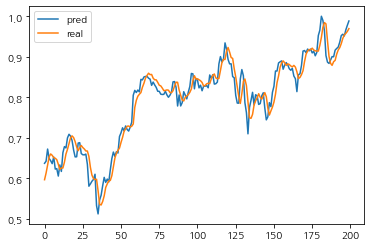

In [27]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['pred', 'real'])
plt.show()

# Bidrectional

In [28]:
cell = tf.keras.layers.LSTMCell(32)
lstm = tf.keras.layers.RNN(cell)

X = tf.keras.layers.Input(shape=(7,5))
net = tf.keras.layers.Bidirectional(lstm)(X)
Y = tf.keras.layers.Dense(1)(net)

model2 = tf.keras.models.Model(X, Y)
model2.compile(
    optimizer='adam',
    loss='mse'
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 7, 5)]            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9728      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,793
Trainable params: 9,793
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.fit(x_train, y_train, epochs=50)

Epoch 1/50
525/525 [==============================] - 1s 2ms/sample - loss: 0.0883
Epoch 2/50
525/525 [==============================] - 0s 274us/sample - loss: 0.0165
Epoch 3/50
525/525 [==============================] - 0s 271us/sample - loss: 0.0068
Epoch 4/50
525/525 [==============================] - 0s 265us/sample - loss: 0.0035
Epoch 5/50
525/525 [==============================] - 0s 275us/sample - loss: 0.0027
Epoch 6/50
525/525 [==============================] - 0s 266us/sample - loss: 0.0026
Epoch 7/50
525/525 [==============================] - 0s 266us/sample - loss: 0.0026
Epoch 8/50
525/525 [==============================] - 0s 292us/sample - loss: 0.0025
Epoch 9/50
525/525 [==============================] - 0s 274us/sample - loss: 0.0025
Epoch 10/50
525/525 [==============================] - 0s 268us/sample - loss: 0.0025
Epoch 11/50
525/525 [==============================] - 0s 271us/sample - loss: 0.0024
Epoch 12/50
525/525 [==============================] - 0s 266us/s

# 다음 문자 예측

In [31]:
contents = """
여린 부리 파랑새
사랑이라는 빛 하나 문다

바람 지나는 밤낮
나의 온기속에 그대 심장을
그대 온기 속에 나의 심장을

미소도 눈물도 두 심장
하나의 맥박되어

덤불 어지러운 미물의 제자리걸음
빛으로 이끌어내며
사철바람 타고 날개치는

고운 부리 파랑새
사랑이라는 빛 하나 싣고 간다
"""

In [32]:
char_set = list(set(contents))
print(char_set)

char_dic = {c: i for i, c in enumerate(char_set)}
print(char_dic)

char_len = len(char_set)
print(char_len)

['으', '자', '는', '장', '러', '싣', '\n', '도', '간', '사', '빛', '며', '제', '바', '되', '철', '린', '소', '눈', '람', '지', ' ', '기', '낮', '맥', '심', '걸', '운', '끌', '온', '랑', '파', '미', '다', '밤', '대', '불', '음', '치', '로', '새', '을', '라', '여', '나', '어', '리', '그', '속', '박', '이', '두', '개', '덤', '의', '에', '하', '문', '타', '날', '내', '부', '물', '고']
{'으': 0, '자': 1, '는': 2, '장': 3, '러': 4, '싣': 5, '\n': 6, '도': 7, '간': 8, '사': 9, '빛': 10, '며': 11, '제': 12, '바': 13, '되': 14, '철': 15, '린': 16, '소': 17, '눈': 18, '람': 19, '지': 20, ' ': 21, '기': 22, '낮': 23, '맥': 24, '심': 25, '걸': 26, '운': 27, '끌': 28, '온': 29, '랑': 30, '파': 31, '미': 32, '다': 33, '밤': 34, '대': 35, '불': 36, '음': 37, '치': 38, '로': 39, '새': 40, '을': 41, '라': 42, '여': 43, '나': 44, '어': 45, '리': 46, '그': 47, '속': 48, '박': 49, '이': 50, '두': 51, '개': 52, '덤': 53, '의': 54, '에': 55, '하': 56, '문': 57, '타': 58, '날': 59, '내': 60, '부': 61, '물': 62, '고': 63}
64


In [33]:
data = [char_dic[w] for w in contents]
x_data = np.array([data[i:i+10] for i in range(len(data) - 10)])

#import pprint
#pprint.pprint(x_data)

y_data = np.array([data[i+1:i+11] for i in range(len(data) - 10)])

print(x_data.shape, y_data.shape)

(150, 10) (150, 10)


In [34]:
x_data = tf.keras.utils.to_categorical(x_data, char_len)
y_data = tf.keras.utils.to_categorical(y_data, char_len)

print(x_data.shape, y_data.shape)

(150, 10, 64) (150, 10, 64)


In [35]:
cell = tf.keras.layers.GRUCell(64)

X = tf.keras.layers.Input(shape=(10, char_len))
net = tf.keras.layers.RNN(cell, return_sequences=True)(X)   # return_sequences=True 이면 중간의 hidden_state 값도 return함(차원이 하나 더 생김)
net = tf.keras.layers.Dense(char_len)(net)
Y = tf.keras.layers.Activation('softmax')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 10, 64)]          0         
_________________________________________________________________
rnn_4 (RNN)                  (None, 10, 64)            24768     
_________________________________________________________________
dense_6 (Dense)              (None, 10, 64)            4160      
_________________________________________________________________
activation_4 (Activation)    (None, 10, 64)            0         
Total params: 28,928
Trainable params: 28,928
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_data, y_data, epochs=200)

Epoch 1/200
150/150 [==============================] - 0s 3ms/sample - loss: 4.1472 - acc: 0.0140
Epoch 2/200
150/150 [==============================] - 0s 294us/sample - loss: 4.1155 - acc: 0.0900
Epoch 3/200
150/150 [==============================] - 0s 334us/sample - loss: 4.0822 - acc: 0.1780
Epoch 4/200
150/150 [==============================] - 0s 298us/sample - loss: 4.0454 - acc: 0.2300
Epoch 5/200
150/150 [==============================] - 0s 331us/sample - loss: 4.0015 - acc: 0.2420
Epoch 6/200
150/150 [==============================] - 0s 331us/sample - loss: 3.9451 - acc: 0.2427
Epoch 7/200
150/150 [==============================] - 0s 337us/sample - loss: 3.8678 - acc: 0.2227
Epoch 8/200
150/150 [==============================] - 0s 328us/sample - loss: 3.7578 - acc: 0.2133
Epoch 9/200
150/150 [==============================] - 0s 330us/sample - loss: 3.6874 - acc: 0.2113
Epoch 10/200
150/150 [==============================] - 0s 321us/sample - loss: 3.6376 - acc: 0.2167
E

150/150 [==============================] - 0s 383us/sample - loss: 0.3461 - acc: 0.9360
Epoch 83/200
150/150 [==============================] - 0s 394us/sample - loss: 0.3410 - acc: 0.9367
Epoch 84/200
150/150 [==============================] - 0s 405us/sample - loss: 0.3362 - acc: 0.9393
Epoch 85/200
150/150 [==============================] - 0s 359us/sample - loss: 0.3316 - acc: 0.9387
Epoch 86/200
150/150 [==============================] - 0s 318us/sample - loss: 0.3270 - acc: 0.9393
Epoch 87/200
150/150 [==============================] - 0s 384us/sample - loss: 0.3226 - acc: 0.9393
Epoch 88/200
150/150 [==============================] - 0s 378us/sample - loss: 0.3185 - acc: 0.9387
Epoch 89/200
150/150 [==============================] - 0s 393us/sample - loss: 0.3145 - acc: 0.9393
Epoch 90/200
150/150 [==============================] - 0s 341us/sample - loss: 0.3105 - acc: 0.9393
Epoch 91/200
150/150 [==============================] - 0s 319us/sample - loss: 0.3071 - acc: 0.9393
Epo

150/150 [==============================] - 0s 310us/sample - loss: 0.1860 - acc: 0.9420
Epoch 163/200
150/150 [==============================] - 0s 312us/sample - loss: 0.1848 - acc: 0.9427
Epoch 164/200
150/150 [==============================] - 0s 319us/sample - loss: 0.1844 - acc: 0.9420
Epoch 165/200
150/150 [==============================] - 0s 302us/sample - loss: 0.1834 - acc: 0.9420
Epoch 166/200
150/150 [==============================] - 0s 312us/sample - loss: 0.1829 - acc: 0.9413
Epoch 167/200
150/150 [==============================] - 0s 300us/sample - loss: 0.1820 - acc: 0.9413
Epoch 168/200
150/150 [==============================] - 0s 318us/sample - loss: 0.1813 - acc: 0.9413
Epoch 169/200
150/150 [==============================] - 0s 304us/sample - loss: 0.1807 - acc: 0.9407
Epoch 170/200
150/150 [==============================] - 0s 308us/sample - loss: 0.1800 - acc: 0.9420
Epoch 171/200
150/150 [==============================] - 0s 309us/sample - loss: 0.1794 - acc: 0

In [38]:
pred = model.predict(x_data)    # 본 예제는 training에 사용한 데이터를 예측에 사용했기 때문에 100% 정확한 값을 출력함(전체적인 로직만 참고)
print(pred.shape)

pred = np.argmax(pred, axis=2)
print(pred.shape)

for i, str in enumerate(pred):
    if i == 0:
        print("".join([char_set[c] for c in str]), end='')
    else:
        print(char_set[str[-1]], end='')

(150, 10, 64)
(150, 10)

린 부리 파랑새
사랑이라는 빛 하나 싣다

바람 지나는 밤낮
나의 온기속에 그대 심장을
그대 온기 속에 나의 심장을

미소도 눈물도 두 심장
하나의 맥박되어

덤불 어지러운 미물의 제자리걸음
빛으로 이끌어내며
사철바람 타고 날개치는

고운 부리 파랑새
사랑이라는 빛 하나 싣고 간다


# Embedding (영화 리뷰 데이터)

In [39]:
import tensorflow as tf

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(x_train.shape, y_train.shape)
print(x_train[0])
print(y_train[0])

(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [41]:
print(max([len(text) for text in x_train]))
print(min([len(text) for text in x_train]))
print(max([max(text) for text in x_train]))   # 원핫벡터의 차원 수 (데이터 로드 시 단어의 수를 10,000개로 제한 했음))

2494
11
9999


In [42]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(x_train.shape, y_train.shape)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=64)
print(x_train.shape)

(25000,) (25000,)
(25000, 64)


In [43]:
X = tf.keras.layers.Input(shape=(64, ))

net = tf.keras.layers.Embedding(10000, 30)(X)
# (25000, 64, 30)

cell = tf.keras.layers.LSTMCell(50)
net = tf.keras.layers.RNN(cell)(net)
net = tf.keras.layers.Dense(1)(net)
Y = tf.keras.layers.Activation('sigmoid')(net)

model = tf.keras.models.Model(X, Y)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 64, 30)            300000    
_________________________________________________________________
rnn_5 (RNN)                  (None, 50)                16200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 316,251
Trainable params: 316,251
Non-trainable params: 0
_________________________________________________________________


In [45]:
# rnn parameter(LSTM 이기 때문에 4배) : ((30 + 50) * 50 + 50) * 4

In [46]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.4448 - acc: 0.7883
Epoch 2/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.3107 - acc: 0.8691
Epoch 3/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2578 - acc: 0.8941
Epoch 4/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.2040 - acc: 0.9198
Epoch 5/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1545 - acc: 0.9391
Epoch 6/10
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.1152 - acc: 0.9562
Epoch 7/10
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0959 - acc: 0.9645
Epoch 8/10
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.0762 - acc: 0.9731
Epoch 9/10
25000/25000 [==============================] - 34s 1ms/sample - loss: 0.0663 - acc: 0.9766
Epoch 10/10
25000/25000 [==============================] - 33s 1ms/sample - loss: 